In [339]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

In [340]:
import networkx as nx

In [ ]:
fly_nums = range(1389,1402)#,1545)
multi_fly_df = util.construct_multi_fly_df(fly_nums)

Making dataframe for fly number 1389
Making dataframe for fly number 1390
Making dataframe for fly number 1391
Making dataframe for fly number 1392
Making dataframe for fly number 1393
Making dataframe for fly number 1394
Making dataframe for fly number 1395
Making dataframe for fly number 1396
Making dataframe for fly number 1397
Making dataframe for fly number 1398
Making dataframe for fly number 1399
Making dataframe for fly number 1400
Making dataframe for fly number 1401


In [267]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))

# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'fly_num' 'pr_left' 'tpd_left' 'nm_left'
 'iii1_left' 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left'
 'i1_left' 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right']
['cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0'
 'ol_blocks, g_x=-12, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0'
 'ol_blocks, g_x=12, g_y=0 b_x=0, b_y=0'
 'ol_stripe, g_x

In [358]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1540)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [342]:
#filtered_df= multi_fly_df.loc[multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True']
#filtered_df= multi_fly_df
filtered_df= multi_fly_df.loc[multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0']
#filtered_df= multi_fly_df.loc(multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=0, b_y=0, ch=False')
#print(filtered_df.head())

In [360]:
layout = fifi.FigureLayout('graph_layout.svg',make_mplfigures=True)


cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

       
graphs = {}
for flynum in fly_nums:
    df=(filtered_df.loc[filtered_df['fly_num']==flynum])
    state_mtrx = np.vstack([df[key] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    cor_mtrx = np.dot(std_mtrx,std_mtrx.T)
    G = nx.Graph()
    for i,lbl1 in enumerate(sorted_keys):
        for j,lbl2 in enumerate(sorted_keys):
            G.add_edge(lbl1,lbl2,weight = cor_mtrx[i,j])
    graphs[int(flynum)] = G

edges = G.edges
c_ex = layout.pathspecs['excitatory'].mplkwargs()['edgecolor']
c_in = layout.pathspecs['inhibitory'].mplkwargs()['edgecolor']
colors = [{True:c_ex,False:c_in}[G[e[0]][e[1]]['weight']>0.] for e in edges]


h = float(layout.layout_uh)
pos_dict = {}
for n in G.nodes:
    #n_s = '%s_%s'%(n[0][0].capitalize(),n[1])
    n1, n2 = n.split('_')
    n_s = '%s_%s'%(n2[0].capitalize(), n1)
    cx = float(layout.pathspecs[n_s]['cx'])
    cy = h-float(layout.pathspecs[n_s]['cy'])
    try:
        if 'transform' in layout.pathspecs[n_s].keys():
            t1 = fifi.svg_to_axes.parse_transform(layout.pathspecs[n_s]['transform'])
            p = np.dot(t1,np.array([cx,cy,1]))
            pos_dict[n] = (p[0],p[1])
        else:
            pos_dict[n]  = (cx,cy)
    except KeyError:
        print n

for flynum,G in graphs.items():
    edges= G.edges
    #weights = [np.abs(G[e[0]][e[1]]['weight'])**2.6/100000000000. for e in edges]
    weights = [np.abs(G[e[0]][e[1]]['weight'])**3.5/100000000000. for e in edges]
    nx.draw(G, 
            ax = layout.axes['network_graph_layout'],
            pos = pos_dict,
            font_color = 'r',
            with_labels= False,
            width = weights,
            edge_color = colors,
            node_color = 'k',
            alpha = 0.1)

    
    
layout.axes['network_graph_layout'].set_ybound(0,layout.axes['network_graph_layout'].h)
layout.axes['network_graph_layout'].set_xbound(0,layout.axes['network_graph_layout'].w)

layout.save('graph_1.svg')
plt.close('all')
display(SVG('graph.svg'))

ValueError: list.remove(x): x not in list

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii3_right', 'iii3_left']


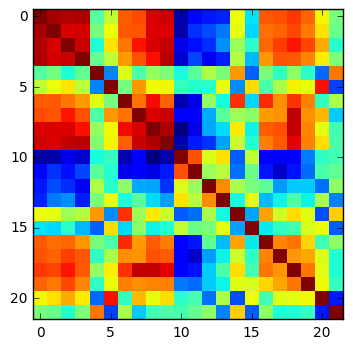

In [348]:
ax=plt.imshow(cor_mtrx, interpolation='none')
sorted_keys
#ax.set_xticklabels(sorted_keys)
print(sorted_keys)
plt.show()

##set heat map labels and colors
##check color scale/value is properly centerd


In [248]:
#print(filtered_df)

In [254]:
#filtered_df= multi_fly_df.loc[multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True']
#filtered_df= multi_fly_df
filtered_df= multi_fly_df.loc[multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0']
#filtered_df= multi_fly_df.loc(multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=0, b_y=0, ch=False')
#print(filtered_df.head())

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


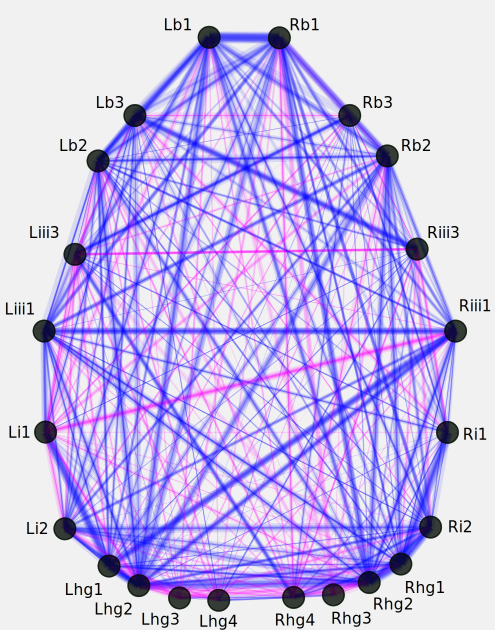

In [350]:
layout = fifi.FigureLayout('graph_layout.svg',make_mplfigures=True)


cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

       
graphs = {}
for flynum in fly_nums:
    df=(filtered_df.loc[filtered_df['fly_num']==flynum])
    state_mtrx = np.vstack([df[key] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    cor_mtrx = np.dot(std_mtrx,std_mtrx.T)
    G = nx.Graph()
    for i,lbl1 in enumerate(sorted_keys):
        for j,lbl2 in enumerate(sorted_keys):
            G.add_edge(lbl1,lbl2,weight = cor_mtrx[i,j])
    graphs[int(flynum)] = G

edges = G.edges
c_ex = layout.pathspecs['excitatory'].mplkwargs()['edgecolor']
c_in = layout.pathspecs['inhibitory'].mplkwargs()['edgecolor']
colors = [{True:c_ex,False:c_in}[G[e[0]][e[1]]['weight']>0.] for e in edges]


h = float(layout.layout_uh)
pos_dict = {}
for n in G.nodes:
    #n_s = '%s_%s'%(n[0][0].capitalize(),n[1])
    n1, n2 = n.split('_')
    n_s = '%s_%s'%(n2[0].capitalize(), n1)
    cx = float(layout.pathspecs[n_s]['cx'])
    cy = h-float(layout.pathspecs[n_s]['cy'])
    try:
        if 'transform' in layout.pathspecs[n_s].keys():
            t1 = fifi.svg_to_axes.parse_transform(layout.pathspecs[n_s]['transform'])
            p = np.dot(t1,np.array([cx,cy,1]))
            pos_dict[n] = (p[0],p[1])
        else:
            pos_dict[n]  = (cx,cy)
    except KeyError:
        print n

for flynum,G in graphs.items():
    edges= G.edges
    #weights = [np.abs(G[e[0]][e[1]]['weight'])**2.6/100000000000. for e in edges]
    weights = [np.abs(G[e[0]][e[1]]['weight'])**3.5/100000000000. for e in edges]
    nx.draw(G,
            ax = layout.axes['network_graph_layout'],
            pos = pos_dict,
            font_color = 'r',
            with_labels= False,
            width = weights,
            edge_color = colors,
            node_color = 'k',
            alpha = 0.1)

    
    
layout.axes['network_graph_layout'].set_ybound(0,layout.axes['network_graph_layout'].h)
layout.axes['network_graph_layout'].set_xbound(0,layout.axes['network_graph_layout'].w)

layout.save('graph.svg')
plt.close('all')
display(SVG('graph.svg'))


['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii3_right', 'iii3_left']


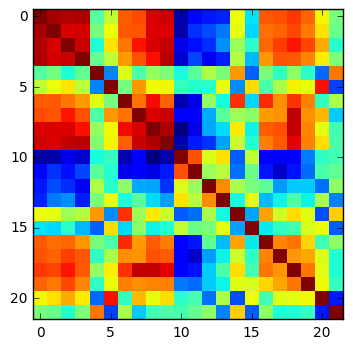

In [351]:
ax=plt.imshow(cor_mtrx, interpolation='none')
sorted_keys
#ax.set_xticklabels(sorted_keys)
print(sorted_keys)
plt.show()

In [354]:
filtered_df= multi_fly_df.loc[multi_fly_df['stimulus']=='ol_blocks, g_x=-12, g_y=0 b_x=0, b_y=0']

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


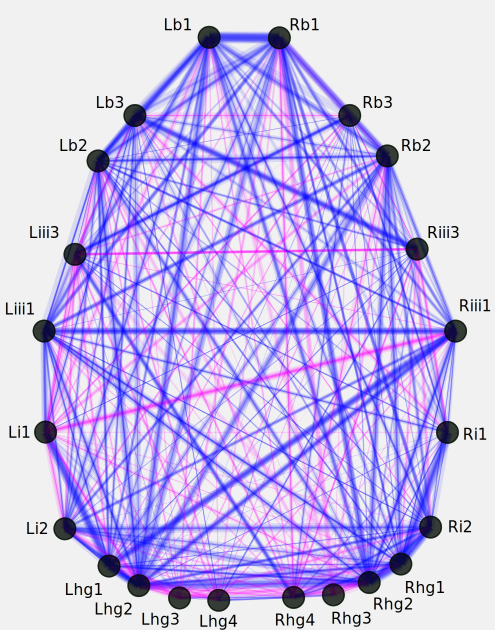

In [359]:
layout = fifi.FigureLayout('graph_layout.svg',make_mplfigures=True)


cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

       
graphs = {}
for flynum in fly_nums:
    df=(filtered_df.loc[filtered_df['fly_num']==flynum])
    state_mtrx = np.vstack([df[key] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    cor_mtrx = np.dot(std_mtrx,std_mtrx.T)
    G = nx.Graph()
    for i,lbl1 in enumerate(sorted_keys):
        for j,lbl2 in enumerate(sorted_keys):
            G.add_edge(lbl1,lbl2,weight = cor_mtrx[i,j])
    graphs[int(flynum)] = G

edges = G.edges
c_ex = layout.pathspecs['excitatory'].mplkwargs()['edgecolor']
c_in = layout.pathspecs['inhibitory'].mplkwargs()['edgecolor']
colors = [{True:c_ex,False:c_in}[G[e[0]][e[1]]['weight']>0.] for e in edges]


h = float(layout.layout_uh)
pos_dict = {}
for n in G.nodes:
    #n_s = '%s_%s'%(n[0][0].capitalize(),n[1])
    n1, n2 = n.split('_')
    n_s = '%s_%s'%(n2[0].capitalize(), n1)
    cx = float(layout.pathspecs[n_s]['cx'])
    cy = h-float(layout.pathspecs[n_s]['cy'])
    try:
        if 'transform' in layout.pathspecs[n_s].keys():
            t1 = fifi.svg_to_axes.parse_transform(layout.pathspecs[n_s]['transform'])
            p = np.dot(t1,np.array([cx,cy,1]))
            pos_dict[n] = (p[0],p[1])
        else:
            pos_dict[n]  = (cx,cy)
    except KeyError:
        print n

for flynum,G in graphs.items():
    edges= G.edges
    #weights = [np.abs(G[e[0]][e[1]]['weight'])**2.6/100000000000. for e in edges]
    weights = [np.abs(G[e[0]][e[1]]['weight'])**3.55/100000000000. for e in edges]
    nx.draw(G,
            ax = layout.axes['network_graph_layout'],
            pos = pos_dict,
            font_color = 'r',
            with_labels= False,
            width = weights,
            edge_color = colors,
            node_color = 'k',
            alpha = 0.1)

    
    
layout.axes['network_graph_layout'].set_ybound(0,layout.axes['network_graph_layout'].h)
layout.axes['network_graph_layout'].set_xbound(0,layout.axes['network_graph_layout'].w)

layout.save('graph_2.svg')
plt.close('all')
display(SVG('graph.svg'))

### convert to pngs for vid

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii3_right', 'iii3_left']


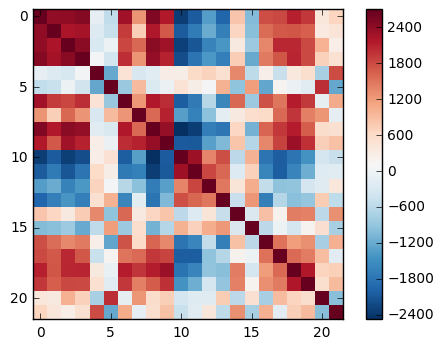

In [357]:
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal


#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
#cmaps['Diverging'] = ['PiBu']

ax=plt.imshow(cor_mtrx, cmap='RdBu_r', interpolation='none')

#plt.cmap('Diverging')
sorted_keys
#ax.set_xticklabels(sorted_keys)
print(sorted_keys)


plt.colorbar()

plt.show()

In [330]:
import matplotlib as plt
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal



#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
#cmaps['Diverging'] = ['PiBu']

ax=plt.imshow(cor_mtrx, cmap='bwr', interpolation='none')

#plt.cmap('Diverging')
sorted_keys
#ax.set_xticklabels(sorted_keys)
ax.set_xticklabels()
print(sorted_keys)

x = np.arange((len(sorted_keys)))
y = x.copy()
ticks_labels = [sorted_keys]

# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(ticks_labels, rotation='vertical', fontsize=18)
ax.set_yticklabels(ticks_labels, rotation='vertical', fontsize=18)


plt.colorbar()

plt.show()

AttributeError: 'module' object has no attribute 'imshow'

In [336]:
#### Color and zeroing 


import matplotlib as plt
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal



#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
#cmaps['Diverging'] = ['PiBu']

ax=plt.imshow(cor_mtrx, cmap='bwr', interpolation='none')

#plt.cmap('Diverging')
sorted_keys
#ax.set_xticklabels(sorted_keys)
ax.set_xticklabels()
print(sorted_keys)

x = np.arange((len(sorted_keys)))
y = x.copy()
ticks_labels = [sorted_keys]

# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(ticks_labels, rotation='vertical', fontsize=18)
ax.set_yticklabels(ticks_labels, rotation='vertical', fontsize=18)


plt.colorbar()

plt.show()


AttributeError: 'module' object has no attribute 'imshow'